<a href="https://colab.research.google.com/github/Hyunni0/tensorflow/blob/main/Neural_Network_for_Iris_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
# 1. 과거 데이터 준비

filepath = '/content/sample_data/iris.csv'
iris = pd.read_csv(filepath)
iris.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# one-hot encoding

after_encoding = pd.get_dummies(iris)
after_encoding.head()
print(after_encoding.columns)

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')


In [ ]:
# 독립변수, 종속변수

independent = after_encoding[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
dependent = after_encoding[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(independent.shape, dependent.shape)

(150, 4) (150, 3)


In [ ]:
# 2. 모델 구조

X = tf.keras.layers.Input(shape=[4])

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(3, activation='softmax')(H)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer = optimizer)

In [ ]:
# 모델 구조 확인

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 99
Trainable params: 83
Non-trainable params: 16
________________________________________________________________

In [ ]:
# 3. 모델 학습

history = model.fit(independent, dependent, epochs=100, verbose=1)

# loss 값의 평균
loss_values = history.history['loss']
aver_loss = sum(loss_values) / len(loss_values)
print("loss 평균 : " , aver_loss)

# accuracy 값의 평균
accu_values = history.history['accuracy']
aver_accu = sum(accu_values) / len(accu_values)
print("Accuracy 평균 : " , aver_accu)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9800
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9400
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9800
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9600
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9800
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9800
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9533
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9733
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9867
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9600
Epoch 11/100
5/5 [===========

이전 loss 및 accuracy 값

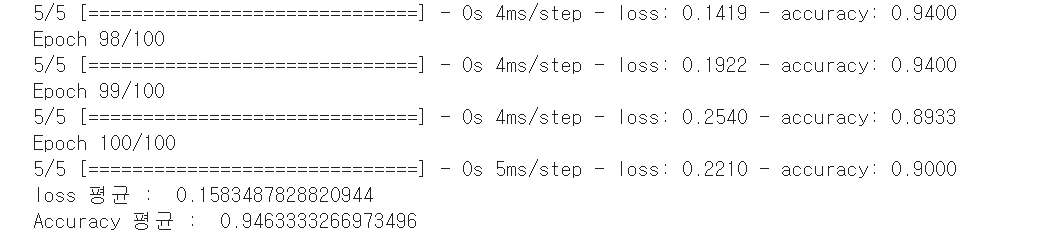

In [ ]:
# 모델 이용, 맨 처음 데이터 5개

print(model.predict(independent[:5]))
print(dependent[:5])

1/1 [==============================] - 0s 80ms/step
[[9.9999988e-01 1.1466407e-08 1.3671993e-07]
 [9.9999952e-01 1.7907077e-07 2.0474388e-07]
 [9.9999964e-01 3.5397381e-08 3.6360578e-07]
 [9.9999928e-01 3.8586541e-07 3.2399987e-07]
 [9.9999988e-01 8.1470768e-09 1.4328904e-07]]
   품종_setosa  품종_versicolor  품종_virginica
0          1              0             0
1          1              0             0
2          1              0             0
3          1              0             0
4          1              0             0
